# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Yuliya Kizelbasheva

**Honor Pledge:**  
I pledge on my honor that I, **Yuliya Kizelbasheva**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [1]:
# Your package imports here
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [5]:
df = pd.read_csv('gas_emissions.csv')

In [6]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [7]:
print(df.isnull().sum())

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [8]:
print(df[df['CO']>3]['AP'].mean())

1015.6900173490633


#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

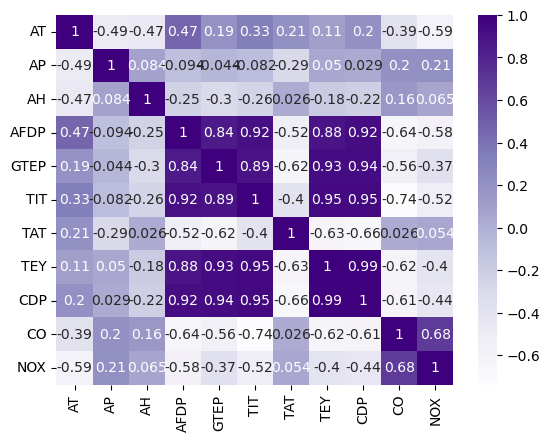

In [9]:
# Create correlation matrix
cor_matrix = df.corr()
ax = sns.heatmap(cor_matrix, annot=True, cmap = "Purples")
plt.show()

#### Create a scatter plot of 'TEY' vs 'CDP'

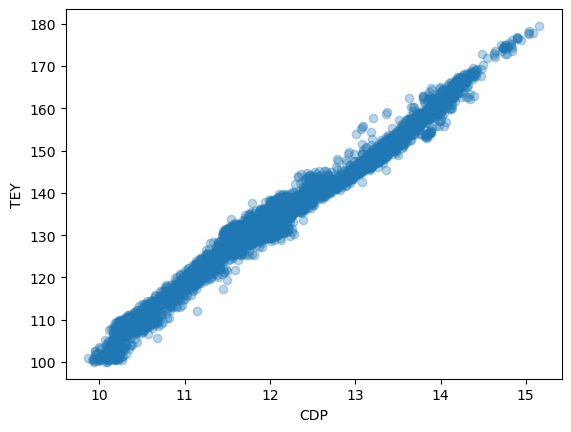

In [10]:
# Create a sctterplot
cdp = df['CDP']
tey = df['TEY']

plt.scatter(cdp, tey, alpha=0.3)
plt.xlabel('CDP')
plt.ylabel('TEY')
plt.show()

#### Create histograms for CO and NOX.

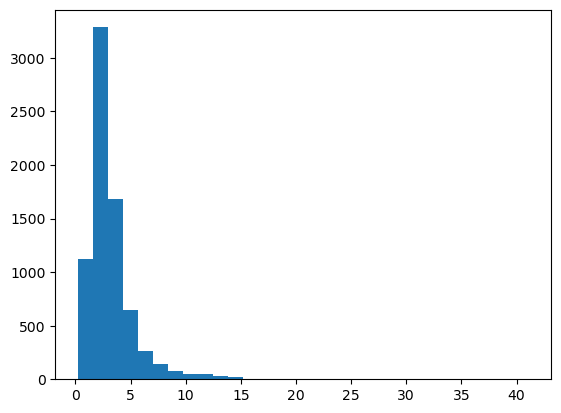

In [11]:
# Create a histogram
plt.hist(df['CO'], bins=30)
plt.show()

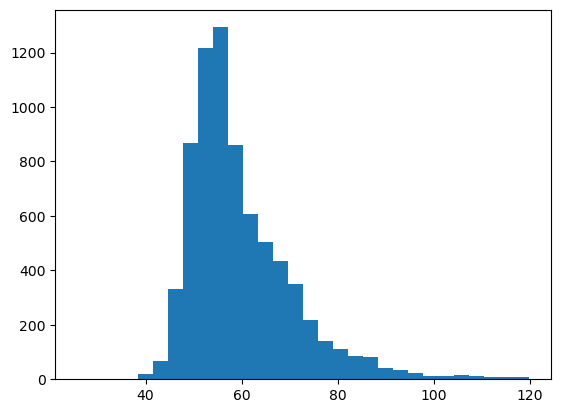

In [12]:
# Create a histogram
plt.hist(df['NOX'], bins=30)
plt.show()

#### Create a sctter plot of CO vs NOX.

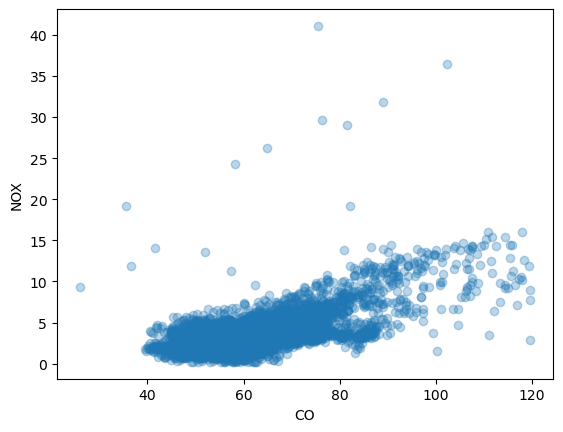

In [13]:
# Create a scatter plot
co = df['CO']
nox = df['NOX']

plt.scatter(nox,co, alpha=0.3)
plt.xlabel('CO')
plt.ylabel('NOX')
plt.show()

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [14]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [16]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [17]:
X_train.shape

(5316, 9)

In [18]:
X_val.shape

(1329, 9)

In [19]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calculate R2
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("R2 training:", r2_train)
print("R2 validation:", r2_val)
print("RMSE training:", rmse_train)
print("RMSE validation:", rmse_val)

R2 training: 0.6640090820784397
R2 validation: 0.646343190818214
RMSE training: 1.2720122104103535
RMSE validation: 1.3884894690085987


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [24]:
# Fit the mdoel
estimator = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=RANDOM_STATE)
estimator.fit(X_train, y_train)

# Make predictions
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)

# Calculate R2
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print the results
print("R2 training:", r2_train)
print("R2 validation:", r2_val)
print("RMSE training:", rmse_train)
print("RMSE validation:", rmse_val)

R2 training: 0.8231480657119852
R2 validation: 0.7545793317706144
RMSE training: 0.9228527659696341
RMSE validation: 1.156663803948962


## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [25]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [26]:
# Fit the model
estimator = SVR(kernel='linear')
estimator.fit(X_train, y_train)

# Make predictions
y_train_pred_linear = estimator.predict(X_train)
y_val_pred_linear = estimator.predict(X_val)

# Calculate R2
r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_val_linear = r2_score(y_val, y_val_pred_linear)

# Calculate RMSE
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_val_linear = np.sqrt(mean_squared_error(y_val, y_val_pred_linear))

print("R2 training:", r2_train_linear)
print("R2 validation:", r2_val_linear)
print("RMSE validation", rmse_train_linear)
print("RMSE validation:", rmse_val_linear)

R2 training: 0.6244274365717957
R2 validation: 0.6021652568360496
RMSE validation 1.3448518363320445
RMSE validation: 1.472661495777822


### Polynomial Kernel SVM Regressor

In [27]:
# Fit the model
estimator = SVR(kernel='poly')
estimator.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = estimator.predict(X_train)
y_val_pred_poly = estimator.predict(X_val)

# Calculate R2
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_val_poly = r2_score(y_val, y_val_pred_poly)

# Calculate RMSE
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_val_poly = np.sqrt(mean_squared_error(y_val, y_val_pred_poly))

print("R2 training:", r2_train_poly)
print("R2 validation:", r2_val_poly)
print("RMSE validation", rmse_train_poly)
print("RMSE validation:", rmse_val_poly)

R2 training: 0.7404852376508416
R2 validation: 0.7310487212257807
RMSE validation 1.117914385768905
RMSE validation: 1.210844531836507


### RBF Kernel SVM Regressor

In [28]:
# Fit the model
estimator = SVR(kernel='rbf')
estimator.fit(X_train, y_train)

# Make predictions
y_train_pred_rbf = estimator.predict(X_train)
y_val_pred_rbf = estimator.predict(X_val)

# Calculate R2
r2_train_rbf = r2_score(y_train, y_train_pred_rbf)
r2_val_rbf = r2_score(y_val, y_val_pred_rbf)

# Calculate RMSE
rmse_train_rbf = np.sqrt(mean_squared_error(y_train, y_train_pred_rbf))
rmse_val_rbf = np.sqrt(mean_squared_error(y_val, y_val_pred_rbf))

print("R2 training:", r2_train_rbf)
print("R2 validation:", r2_val_rbf)
print("RMSE validation", rmse_train_rbf)
print("RMSE validation:", rmse_val_rbf)

R2 training: 0.7653225070588422
R2 validation: 0.7476173201040639
RMSE validation 1.0630733502205558
RMSE validation: 1.1729550025939743


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Set the params
param_grid = {'C': [1, 10, 100, 1000],'gamma': [0.001, 0.01, 0.1, 1] }

# Create RBF Kernel SVR
estimator = SVR(kernel='rbf')

# Create GridSearchCV
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get params
best_params = grid_search.best_params_

# Make predictions
best_rbf_svr = grid_search.best_estimator_
y_train_pred = best_rbf_svr.predict(X_train)
y_val_pred = best_rbf_svr.predict(X_val)

# Calculate R2
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("R2 training:", r2_train)
print("R2 validation:", r2_val)
print("RMSE training:", rmse_train)
print("RMSE validation:", rmse_val)

R2 training: 0.7922405098709934
R2 validation: 0.7568500533368002
RMSE training: 1.000248586950884
RMSE validation: 1.151300431383166


## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


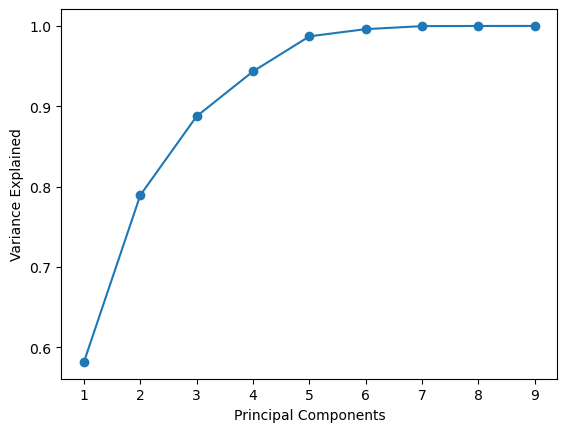

In [33]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [34]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [35]:
# Fit the model
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca2, y_train)

# Make predictions
y_train_pred_linear_pca = linear_reg.predict(X_train_pca2)
y_val_pred_linear_pca = linear_reg.predict(X_val_pca2)

# Calculate R2
r2_train_linear_pca = r2_score(y_train, y_train_pred_linear_pca)
r2_val_linear_pca = r2_score(y_val, y_val_pred_linear_pca)

# Calculate RMSE
rmse_train_linear_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_linear_pca))
rmse_val_linear_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_linear_pca))

print("R2 training:", r2_train_linear_pca)
print("R2 on validation:", r2_val_linear_pca)
print("RMSE on training:", rmse_train_linear_pca)
print("RMSE on validation:", rmse_val_linear_pca)

R2 training: 0.6557906042002006
R2 on validation: 0.6333206399655549
RMSE on training: 1.2874751982855395
RMSE on validation: 1.413822244602062


**RF Regression with PCA transformed data**

In [36]:
# Fit the model
rf_reg_pca = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf_reg_pca.fit(X_train_pca2, y_train)

# Make predictions
y_train_pred_rf_pca = rf_reg_pca.predict(X_train_pca2)
y_val_pred_rf_pca = rf_reg_pca.predict(X_val_pca2)

# Calculate R2
r2_train_rf_pca = r2_score(y_train, y_train_pred_rf_pca)
r2_val_rf_pca = r2_score(y_val, y_val_pred_rf_pca)

# Calculate RMSE
rmse_train_rf_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_pca))
rmse_val_rf_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_pca))

print("R2 training:", r2_train_rf_pca)
print("R2 on validation:", r2_val_rf_pca)
print("RMSE on training:", rmse_train_rf_pca)
print("RMSE on validation:", rmse_val_rf_pca)

R2 training: 0.9630548121704725
R2 on validation: 0.7372337558608612
RMSE on training: 0.4217998787395343
RMSE on validation: 1.1968407422860916


**SVM Regression with PCA transformed data**

In [37]:
# Fit the model
rbf_svr_pca = SVR(kernel='rbf')
rbf_svr_pca.fit(X_train_pca2, y_train)

# Make predictions
y_train_pred_rbf_svr_pca = rbf_svr_pca.predict(X_train_pca2)
y_val_pred_rbf_svr_pca = rbf_svr_pca.predict(X_val_pca2)

# Calculate R2
r2_train_rbf_svr_pca = r2_score(y_train, y_train_pred_rbf_svr_pca)
r2_val_rbf_svr_pca = r2_score(y_val, y_val_pred_rbf_svr_pca)

# Calculate RMSE
rmse_train_rbf_svr_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_rbf_svr_pca))
rmse_val_rbf_svr_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_rbf_svr_pca))

print("R2 training:", r2_train_rbf_svr_pca)
print("R2 on validation:", r2_val_rbf_svr_pca)
print("RMSE on training:", rmse_train_rbf_svr_pca)
print("RMSE on validation:", rmse_val_rbf_svr_pca)

R2 training: 0.7602260497214572
R2 on validation: 0.7469051026270979
RMSE on training: 1.0745546560256456
RMSE on validation: 1.1746088611596979


In [38]:
# Comparison of RBF SVR and RBF SVR PCA

# Results for RBF SVR
print("R2 training:", r2_train_rbf)
print("R2 validation:", r2_val_rbf)
print("RMSE validation", rmse_train_rbf)
print("RMSE validation:", rmse_val_rbf)
print('\n')

# Results for RBF SVR PCA
print("R2 training:", r2_train_rbf_svr_pca)
print("R2 on validation:", r2_val_rbf_svr_pca)
print("RMSE on training:", rmse_train_rbf_svr_pca)
print("RMSE on validation:", rmse_val_rbf_svr_pca)
    

R2 training: 0.7653225070588422
R2 validation: 0.7476173201040639
RMSE validation 1.0630733502205558
RMSE validation: 1.1729550025939743


R2 training: 0.7602260497214572
R2 on validation: 0.7469051026270979
RMSE on training: 1.0745546560256456
RMSE on validation: 1.1746088611596979


According to the results from above. RBF SVR's R2 on both training and validation data is higher than RBF SVR PCA's R2.
But RBF SVR PCA's RMSE on both training and validation data is higher than RBF SVR's RMSE.

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [39]:
from sklearn.preprocessing import Binarizer

In [40]:
binarizer = Binarizer(threshold=3)

In [41]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [42]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

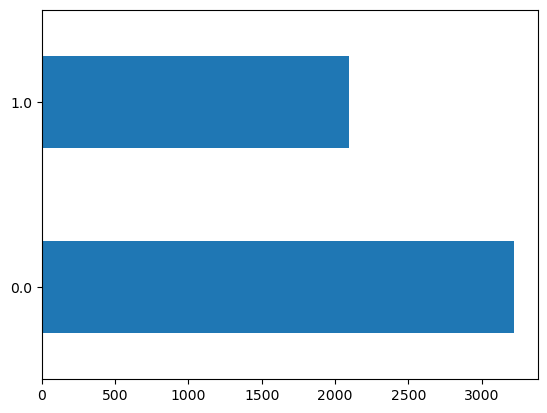

In [43]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [44]:
from sklearn.svm import SVC

In [45]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 

In [46]:
# Define the params grid
param_grid = {'C': [1, 10, 100, 1000],'gamma': [0.001, 0.01, 0.1, 1]}

# Standardize training data
svm_rbf = SVC(kernel='rbf', random_state=RANDOM_STATE, probability=True)

# Fit the model
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_cat)

# Get the best params
best_params = grid_search.best_params_
best_svm_rbf = grid_search.best_estimator_

# Make predictions
y_val_pred_svm_rbf = best_svm_rbf.predict(X_val)
y_val_prob_svm_rbf = best_svm_rbf.predict_proba(X_val)

# Calculate performance metrics
conf_matrix = confusion_matrix(y_val_cat, y_val_pred_svm_rbf)
recall = recall_score(y_val_cat, y_val_pred_svm_rbf)
precision = precision_score(y_val_cat, y_val_pred_svm_rbf)
balanced_accuracy = balanced_accuracy_score(y_val_cat, y_val_pred_svm_rbf)
f1 = f1_score(y_val_cat, y_val_pred_svm_rbf)

print("Best combination of params for SVM", best_params)
print('\n')
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)
print("F1:", f1)

Best combination of params for SVM {'C': 1, 'gamma': 1}


Confusion Matrix:
 [[762  50]
 [ 68 449]]
Recall: 0.8684719535783365
Precision: 0.8997995991983968
Balanced Accuracy: 0.9034477994492668
F1: 0.8838582677165354


#### SVC Model 2

In [47]:
# Define the params grid
param_grid = {'C': [1, 10, 100, 1000],'gamma': [0.001, 0.01, 0.1, 1]}

# Standardize training data
svm_rbf_pca = SVC(kernel='rbf', random_state=RANDOM_STATE, probability=True)

# Fit the model
grid_search_pca = GridSearchCV(estimator=svm_rbf_pca, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train_pca2, y_train_cat)

# Get the best params
best_params_pca = grid_search_pca.best_params_
best_svm_rbf_pca = grid_search_pca.best_estimator_

# Make predictions
y_val_pred_svm_rbf_pca = best_svm_rbf_pca.predict(X_val_pca2)
y_val_prob_svm_rbf_pca = best_svm_rbf_pca.predict_proba(X_val_pca2)

# Calculate performance metrics
conf_matrix_pca = confusion_matrix(y_val_cat, y_val_pred_svm_rbf_pca)
recall_pca = recall_score(y_val_cat, y_val_pred_svm_rbf_pca)
precision_pca = precision_score(y_val_cat, y_val_pred_svm_rbf_pca)
balanced_accuracy_pca = balanced_accuracy_score(y_val_cat, y_val_pred_svm_rbf_pca)
f1_pca = f1_score(y_val_cat, y_val_pred_svm_rbf_pca)

print("Best params for SVM", best_params_pca)
print('\n')
print("Confusion Matrix:\n", conf_matrix_pca)
print("Recall:", recall_pca)
print("Precision:", precision_pca)
print("Balanced Accuracy:", balanced_accuracy_pca)
print("F1:", f1_pca)

Best params for SVM {'C': 1, 'gamma': 1}


Confusion Matrix:
 [[764  48]
 [ 70 447]]
Recall: 0.8646034816247582
Precision: 0.9030303030303031
Balanced Accuracy: 0.9027450905660737
F1: 0.8833992094861659


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [48]:

# Fit the model
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca2, y_train)

# Make predictions
y_train_pred_linear_pca = linear_reg.predict(X_train_pca2)
y_val_pred_linear_pca = linear_reg.predict(X_val_pca2)

# Calculate R2
r2_train_linear_pca = r2_score(y_train, y_train_pred_linear_pca)
r2_val_linear_pca = r2_score(y_val, y_val_pred_linear_pca)

# Calculate RMSE
rmse_train_linear_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_linear_pca))
rmse_val_linear_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_linear_pca))

print("Original")
print("R2 training:", r2_train_linear_pca)
print("R2 on validation:", r2_val_linear_pca)
print("RMSE on training:", rmse_train_linear_pca)
print("RMSE on validation:", rmse_val_linear_pca)
print('\n')

# 

# Option 1: applying polynomial features

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Fit a Linear Regression model on the new feature set
reg_model = LinearRegression()
reg_model.fit(X_train_poly, y_train)

# Make predictions using the Linear Regression model
y_train_pred_b = reg_model.predict(X_train_poly)
y_val_pred_b = reg_model.predict(X_val_poly)

# Calculate R2
r2_train_rbf_svr_pca = r2_score(y_train, y_train_pred_b)
r2_val_rbf_svr_pca = r2_score(y_val, y_val_pred_b)

# Calculate RMSE
rmse_train_rbf_svr_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_b))
rmse_val_rbf_svr_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_b))

print("Updated")
print("R2 training:", r2_train_rbf_svr_pca)
print("R2 on validation:", r2_val_rbf_svr_pca)
print("RMSE on training:", rmse_train_rbf_svr_pca)
print("RMSE on validation:", rmse_val_rbf_svr_pca)
print('\n')
#2

# Fit the model
rf_reg_pca = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf_reg_pca.fit(X_train_pca2, y_train)

# Make predictions
y_train_pred_rf_pca = rf_reg_pca.predict(X_train_pca2)
y_val_pred_rf_pca = rf_reg_pca.predict(X_val_pca2)

# Calculate R2
r2_train_rf_pca = r2_score(y_train, y_train_pred_rf_pca)
r2_val_rf_pca = r2_score(y_val, y_val_pred_rf_pca)

# Calculate RMSE
rmse_train_rf_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_pca))
rmse_val_rf_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_pca))

print("Original")
print("R2 training:", r2_train_rf_pca)
print("R2 on validation:", r2_val_rf_pca)
print("RMSE on training:", rmse_train_rf_pca)
print("RMSE on validation:", rmse_val_rf_pca)


# Tune Random Forest Regression
print('\n')

# Fit the model
rf_reg_pca = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)
rf_reg_pca.fit(X_train_pca2, y_train)

# Make predictions
y_train_pred_rf_pca = rf_reg_pca.predict(X_train_pca2)
y_val_pred_rf_pca = rf_reg_pca.predict(X_val_pca2)

# Calculate R2
r2_train_rf_pca = r2_score(y_train, y_train_pred_rf_pca)
r2_val_rf_pca = r2_score(y_val, y_val_pred_rf_pca)

# Calculate RMSE
rmse_train_rf_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_pca))
rmse_val_rf_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_pca))

print("Updated")
print("R2 training:", r2_train_rf_pca)
print("R2 on validation:", r2_val_rf_pca)
print("RMSE on training:", rmse_train_rf_pca)
print("RMSE on validation:", rmse_val_rf_pca)



Original
R2 training: 0.6557906042002006
R2 on validation: 0.6333206399655549
RMSE on training: 1.2874751982855395
RMSE on validation: 1.413822244602062


Updated
R2 training: 0.7691883892609054
R2 on validation: 0.7399170869980773
RMSE on training: 1.0542808960261356
RMSE on validation: 1.1907140781325705


Original
R2 training: 0.9630548121704725
R2 on validation: 0.7372337558608612
RMSE on training: 0.4217998787395343
RMSE on validation: 1.1968407422860916


Updated
R2 training: 0.9308291459008692
R2 on validation: 0.7367951280210194
RMSE on training: 0.5771505053251687
RMSE on validation: 1.197839251009294


As we can see, when we applied polynomial features, R2 on both training and validation became higher, and RMSE became lower. But when we tuned RF regression, RMSE on both training and validation became higher and R2 became lower.

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [49]:
# Original
# Fit the model
rf_classifier = DecisionTreeClassifier(max_depth=100, min_samples_split=30)
rf_classifier.fit(X_train, y_train_cat)

# Predict on the validation data
y_val_pred_rf = rf_classifier.predict(X_val)

# Calculate classification metrics
recall_rf = recall_score(y_val_cat, y_val_pred_rf)
precision_rf = precision_score(y_val_cat, y_val_pred_rf)
accuracy_rf = accuracy_score(y_val_cat, y_val_pred_rf)
f1_score_rf = f1_score(y_val_cat, y_val_pred_rf)

print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Accuracy:", accuracy_rf)
print("F1:", f1_score_rf)
print('\n')

# Option#1
# Tune the model and fit
rf_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=3)
rf_classifier.fit(X_train, y_train_cat)

# Predict on the validation data
y_val_pred_rf = rf_classifier.predict(X_val)

# Calculate classification metrics
recall_rf = recall_score(y_val_cat, y_val_pred_rf)
precision_rf = precision_score(y_val_cat, y_val_pred_rf)
accuracy_rf = accuracy_score(y_val_cat, y_val_pred_rf)
f1_score_rf = f1_score(y_val_cat, y_val_pred_rf)

print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Accuracy:", accuracy_rf)
print("F1:", f1_score_rf)
print('\n')


# Option#2
# Use StandardScaler on a classifier
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

# Fit the model
rf_sc = DecisionTreeClassifier(max_depth=10, min_samples_split=3)
rf_sc.fit(X_train_sc, y_train_cat)

# Make predictions
y_val_pred_rf_sc = rf_sc.predict(X_val_sc)

# Calculate metrics
accuracy_rf1 = accuracy_score(y_val_cat, y_val_pred_rf_sc)
precision_rf1 = precision_score(y_val_cat, y_val_pred_rf_sc)
recall_rf1 = recall_score(y_val_cat, y_val_pred_rf_sc)
f1_score_rf1 = f1_score(y_val_cat, y_val_pred_rf_sc)

print("Recall:", recall_rf1)
print("Precision:", precision_rf1)
print("Accuracy:", accuracy_rf1)
print("F1:", f1_score_rf1)
print('\n')

Recall: 0.8491295938104448
Precision: 0.8832997987927566
Accuracy: 0.8976674191121143
F1: 0.8658777120315583


Recall: 0.8491295938104448
Precision: 0.8832997987927566
Accuracy: 0.8976674191121143
F1: 0.8658777120315583


Recall: 0.8491295938104448
Precision: 0.888663967611336
Accuracy: 0.8999247554552295
F1: 0.8684470820969336




As we can see from above, in both cases Recall, Accuracy, and F1 score are higher after using both option to improve the regression performance

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [50]:
# Regression with best R2
print("Regression with best R2")
print("R2 training:", r2_train_rf_pca)
print("R2 on validation:", r2_val_rf_pca)
print("RMSE on training:", rmse_train_rf_pca)
print("RMSE on validation:", rmse_val_rf_pca)
print('\n')

# Regression with best RMSE
print("Regression with best RMSE")
print("R2 training:", r2_train_linear_pca)
print("R2 on validation:", r2_val_linear_pca)
print("RMSE on training:", rmse_train_linear_pca)
print("RMSE on validation:", rmse_val_linear_pca)
print('\n')

# Classifier 1 with best metrics
print("Classifier 1 with best metrics")
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Accuracy:", accuracy_rf)
print("F1:", f1_score_rf)
print('\n')

# Classifier 2 with best metrics
print("Classifier 2 with best metrics")
print("Recall:", recall_rf1)
print("Precision:", precision_rf1)
print("Accuracy:", accuracy_rf1)
print("F1:", f1_score_rf1)
print('\n')

Regression with best R2
R2 training: 0.9308291459008692
R2 on validation: 0.7367951280210194
RMSE on training: 0.5771505053251687
RMSE on validation: 1.197839251009294


Regression with best RMSE
R2 training: 0.6557906042002006
R2 on validation: 0.6333206399655549
RMSE on training: 1.2874751982855395
RMSE on validation: 1.413822244602062


Classifier 1 with best metrics
Recall: 0.8491295938104448
Precision: 0.8832997987927566
Accuracy: 0.8976674191121143
F1: 0.8658777120315583


Classifier 2 with best metrics
Recall: 0.8491295938104448
Precision: 0.888663967611336
Accuracy: 0.8999247554552295
F1: 0.8684470820969336




- What did you learn in this project? Any suggestions?

# Your comments
I improved my skills on how to use classifiers and regresssion, and learnt knew way of how to tune the parameteres to get better accuracy. No suggestions, thank you!

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_